In [68]:
#複製 https://github.com/agu3rra/NeuralNetwork-RegressionExample/blob/master/Tutorial.ipynb
from keras.datasets import boston_housing
from keras.datasets import reuters
import numpy as np
import os
import tensorflow as tf
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
import matplotlib.pyplot as plt
import time
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from keras import regularizers
import numpy
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [104]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\補值data\補值_rf_Y為數值.xls',encoding='utf-16')
df = df.loc[:, ["age","serveTime","credLimit","Loan","SalPerY","holdCard","Career"]] 
df[:20]

,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
0,22.000000,2.999291,20000,0.217516,2.600000e+05,0,1
1,28.659308,38.031239,150000,2.000000,3.600000e+05,1,2
2,26.305138,48.000000,60000,0.000000,4.500000e+05,0,2
3,26.000000,12.000000,70000,0.000000,4.000000e+05,1,3
4,31.000000,60.000000,210000,0.000000,8.000000e+05,0,2
5,26.000000,4.000000,100000,0.337767,5.000000e+05,0,2
6,29.000000,36.000000,200000,2.000000,3.000000e+06,1,2
7,22.000000,7.000000,60000,0.252298,5.500000e+05,1,2
8,25.000000,12.000000,250000,0.000000,9.000000e+05,1,2
9,29.000000,48.000000,390000,0.000000,1.000000e+06,1,4


In [105]:
#先打散資料(三次)
for i in range(3):
    df = shuffle(df)
#再切成訓練與測試
train_data, test_data, train_targets, test_targets = train_test_split(df.loc[:, ["age","serveTime","Loan","SalPerY","holdCard","Career"]] , df.loc[:, ["credLimit"]] , test_size=0.3, random_state=42)
print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(1427, 6)
(612, 6)
(1427, 1)
(612, 1)


In [106]:
train_data, test_data, train_targets, test_targets = train_test_split(df.loc[:, ["age","serveTime","Loan","SalPerY","holdCard","Career"]] , df.loc[:, ["credLimit"]] , test_size=0.3, random_state=42)

In [107]:
#正規化
mean = train_data.mean(axis=0)
train_data -=mean
std = train_data.std(axis=0)
train_data/=std
test_data-=mean
test_data/=std

In [108]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(7, activation='relu',
                          input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1))#非0~1的預測,故不使用啟動函數轉為01
    model.compile(optimizer='rmsprop',loss='mae',metrics=['mae'])
    return model
              

In [109]:
k=4
num_val_samples = len(train_data)//k
num_epochs = 20
all_scores=[]
num_val_samples

356

In [110]:
tStart = time.time()
all_mae_histories=[]
for i in range(k):
    print('processing fold #',i)
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples ]
    val_targets = train_targets[i * num_val_samples:(i+1) * num_val_samples]
    partial_train_data = np.concatenate([train_data[:i * num_val_samples ],
                                        train_data[(i+1)*num_val_samples:]],axis=0)
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples ],
                                        train_targets[(i+1)*num_val_samples:]],axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,validation_data=(val_data, val_targets),epochs = num_epochs,batch_size=1,verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
tEnd = time.time()
print ("It cost %f sec" % (tEnd - tStart))#會自動做近位
print (tEnd - tStart)#原型長這樣

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
It cost 641.707359 sec
641.7073588371277


In [112]:
# 看看字典裡有哪些欄位
mae_history = history.history
mae_history

{'val_loss': [153888.3841346998,
  153706.87352418364,
  153202.8509480337,
  152209.23808374297,
  150560.547376997,
  148092.9329792837,
  144639.36316329442,
  140954.4489608936,
  137773.70641952686,
  134455.36505881322,
  131052.80881868856,
  127355.53197693557,
  123407.35559493504,
  119848.19499429424,
  116567.80506605512,
  113547.71615497717,
  110603.19209752457,
  107764.9341725553,
  104980.63670777739,
  102374.05243811446,
  99920.61676779758,
  97642.88159179688,
  95456.97120512201,
  93457.1186550869,
  91613.48935656602,
  90000.51336464185,
  88587.61883887816,
  87336.02433725422,
  86174.32224916609,
  85226.76040752283,
  84407.3813147384,
  83695.92473062237,
  83025.60096997893,
  82421.90713878161,
  81873.59914852527,
  81353.97111459797,
  80854.99909750263,
  80385.47779691889,
  79974.80260818996,
  79625.38291399667,
  79266.5199756408,
  78961.88217334534,
  78671.11446629213,
  78354.47201435217,
  78073.30969375439,
  77830.693663865,
  77590.678425

In [113]:
#建構平均k折驗證分數的歷史
average_mae_history=[
    np.mean([x[i] for x in all_mae_histories])for i in range(num_epochs)
]

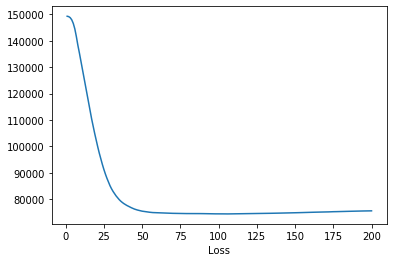

In [114]:
#mae 繪圖
plt.plot(range(1, len(average_mae_history)+1),average_mae_history)
plt.xlabel('Epohs')
plt.xlabel('Loss')
plt.show()
#接著選取MAE最小的周期再作訓練

In [115]:
average_mae_history

[149281.56640625,
 149137.3125,
 148731.88671875,
 147921.265625,
 146561.734375,
 144507.0234375,
 141605.1328125,
 138284.64453125,
 135358.09765625,
 132212.12890625,
 129249.42578125,
 126048.697265625,
 122647.837890625,
 119420.998046875,
 116329.111328125,
 113335.935546875,
 110406.578125,
 107601.6328125,
 104884.916015625,
 102293.8671875,
 99804.064453125,
 97442.046875,
 95259.62890625,
 93202.05078125,
 91279.029296875,
 89525.474609375,
 87935.51953125,
 86485.962890625,
 85123.330078125,
 83966.806640625,
 82957.208984375,
 82069.07421875,
 81245.9375,
 80519.900390625,
 79860.384765625,
 79287.8046875,
 78796.44140625,
 78363.25390625,
 77985.345703125,
 77648.42578125,
 77344.693359375,
 77053.5390625,
 76769.96484375,
 76506.8984375,
 76269.919921875,
 76065.62109375,
 75901.4736328125,
 75749.0185546875,
 75604.5380859375,
 75480.0693359375,
 75388.2294921875,
 75283.4912109375,
 75196.4228515625,
 75134.328125,
 75062.7177734375,
 74987.7412109375,
 74945.677734375,

In [116]:
model = build_model()
model.fit(train_data, train_targets,epochs=80, batch_size=16, verbose=0)

test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

612/612 [==============================] - 0s 28us/step


In [117]:
test_mae_score

129038.140625

# 預測核卡額度誤差僅僅12萬!!